<h1 align="center">Experiment No. 12</h1>
<hr>

<p style="font-size:20px;"><i>$$Generate\ a\ discrete\ time\ sequence\ by\ sampling\ a\ continuous\ time\ signal.\ Show\ that\ with\ sampling\ rates\ less\ than\ Nyquist\ rate,\ aliasing\ occurs\ while\ reconstructing\ the\ signał.$$</i></p>
<hr>

<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi, exp
from scipy.signal import square
from scipy.integrate import simps as intgrt

In [2]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        if signals[index]['isDiscrete'] == True:
            axes[index].stem(signals[index]['x'],signals[index]['y'])
        else:
            axes[index].plot(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

In [3]:
T = 0.25
f = 1/T
sample = int(2 * f) #According to nyquist rate.
t = np.linspace(0, T*2, sample*2, endpoint=False)

In [4]:
t

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875])

In [9]:
omega = (2.0 * pi)/T

originalS = sin(omega * t)

underSample = int((2 * f) - 1)
ut = np.linspace(-2, 2, underSample, endpoint=False)
reconstractedS = sin(omega * ut)

In [7]:
sample, underSample

(8, 9)

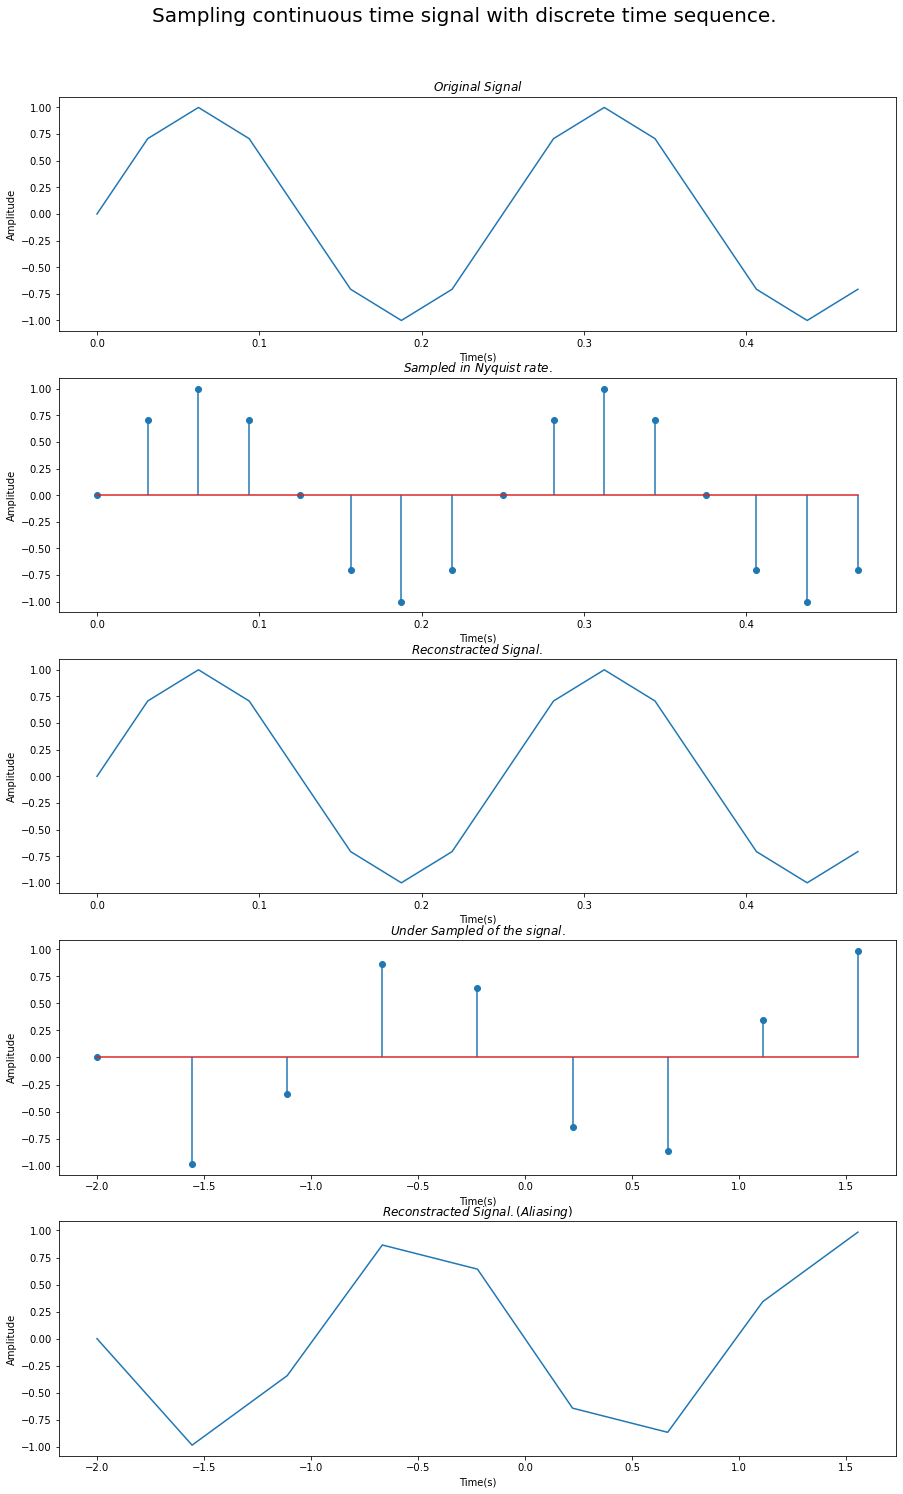

In [8]:
signals = [{'title':'$Original\ Signal$','x':t, 'y':originalS, 'xlabel':'Time(s)', 'ylabel':'Amplitude', 'isDiscrete': False}, 
           {'title':'$Sampled\ in\ Nyquist\ rate.$','x':t, 'y':originalS, 'xlabel':'Time(s)', 'ylabel':'Amplitude', 'isDiscrete': True},
           {'title':'$Reconstracted\ Signal.$','x':t, 'y':originalS, 'xlabel':'Time(s)', 'ylabel':'Amplitude', 'isDiscrete': False},
           {'title':'$Under\ Sampled\ of\ the\ signal.$','x':ut, 'y':reconstractedS, 'xlabel':'Time(s)', 'ylabel':'Amplitude', 'isDiscrete': True},
           {'title':'$Reconstracted\ Signal.(Aliasing)$','x':ut, 'y':reconstractedS, 'xlabel':'Time(s)', 'ylabel':'Amplitude', 'isDiscrete': False}]

getReadySubplot(title='Sampling continuous time signal with discrete time sequence.', signals=signals, figSize=(15,25))
plt.show()